<a href="https://colab.research.google.com/github/abhirbhandary/Python/blob/main/Mushrooms_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Useing ROC Curves and Probabilities for Classification in Python

### 1.&nbsp;Import libraries and files 💾

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [226]:
# train dataset
url = 'https://drive.google.com/file/d/1Op1vQftBKN1lrPVGGLJU-UOlv_dScTup/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mush = pd.read_csv(path)

In [227]:
# validation dataset
url = 'https://drive.google.com/file/d/16S9TzU3JkhwlGhXczibK9f2UbgNaHdM3/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mush_test = pd.read_csv(path)

In [ ]:
mush_test


### 2.&nbsp;The Dataset Column Description

Description of the data

cap-shape: bell=b, conical=c, convex=x, flat=f, nobbed=k, sunken=s

cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

bruises: bruises=t, no=f

stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,

population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

In [ ]:
mush.head(5)

### 3.&nbsp;Exploratory Data Analysis (EDA)

**Identify missing values**: It is quite easy to identify the missing values in pandas. We have used this to calculate the missing value percentage count

In [ ]:
percent_missing = mush.isnull().sum() * 100 / len(mush)
percent_missing.sort_values(ascending=False)

In [ ]:
percent_missing = mush_test.isnull().sum() * 100 / len(mush)
percent_missing.sort_values(ascending=False)

**Variable Distribution**

In [ ]:
mush.hist(bins=50, figsize=(20,10))
plt.show()

**Correlation**

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))

cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap(mush.corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

### 4.&nbsp;Splitting the Data

In [228]:
# change bruises to 0/1
bruises = {True:1,False:0}
# create new column in df
mush['bruise'] = mush['bruises'].map(bruises)
mush.drop('bruises',axis=1,inplace=True)

In [229]:
# change bruises to 0/1
bruises = {True:1,False:0}
# create new column in df
mush_test['bruise'] = mush_test['bruises'].map(bruises)
mush_test.drop('bruises',axis=1,inplace=True)

In [230]:
mush.drop('Id',axis=1,inplace=True)

In [114]:
mush_test

,cap.shape,cap.color,stalk.color.above.ring,stalk.color.below.ring,population,bruise
Id,,,,,,
5165,f,w,w,w,v,1
4281,f,g,n,p,v,0
231,x,n,w,p,v,1
3890,f,n,w,w,s,0
1521,x,y,n,p,v,0
...,...,...,...,...,...,...
983,x,n,w,y,v,0
7055,x,e,p,g,v,1
7456,x,y,b,n,y,0


In [231]:
mush_test.set_index('Id',inplace=True)

In [232]:
X = mush.drop(columns=['poisonous']).copy()
y = mush['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)
X_train.head()

,cap.shape,cap.color,stalk.color.above.ring,stalk.color.below.ring,population,bruise
1725,f,g,w,p,y,1
1260,f,g,g,g,v,1
4551,x,y,p,b,y,0
2442,f,c,w,n,v,0
6109,x,g,g,w,v,1


## 5. Pipeline

In [233]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5199 entries, 1725 to 4547
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cap.shape               5199 non-null   object
 1   cap.color               5199 non-null   object
 2   stalk.color.above.ring  5199 non-null   object
 3   stalk.color.below.ring  5199 non-null   object
 4   population              5199 non-null   object
 5   bruise                  5199 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 284.3+ KB


In [234]:
# determine the columns that will need to go to the numerical pipeline
# also determine those columns that need to go to the categorical pipeline
X_num = X.select_dtypes(include=['int64', 'float64']).columns
X_cat = X.select_dtypes(include=['object']).columns

In [235]:
X_cat

Index(['cap.shape', 'cap.color', 'stalk.color.above.ring',
       'stalk.color.below.ring', 'population'],
      dtype='object')

In [236]:
X_num

Index(['bruise'], dtype='object')

In [237]:
# numeric pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
num_pipe = make_pipeline(SimpleImputer())
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [238]:
# create the categorical pipeline (one-hot encoder)
from sklearn.preprocessing import OneHotEncoder
cat_pipe = make_pipeline(OneHotEncoder(drop='first', handle_unknown='ignore'))
cat_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [239]:
from sklearn.compose import ColumnTransformer
full_processor = ColumnTransformer(transformers=[("numeric_pipe", num_pipe, X_num),
                        ("categoric_pipe", cat_pipe, X_cat)])
full_processor

ColumnTransformer(transformers=[('numeric_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['bruise'], dtype='object')),
                                ('categoric_pipe',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 Index(['cap.shape', 'cap.color', 'stalk.color.above.ring',
       'stalk.color.below.ring', 'population'],
      dtype='object'))])

### 6.&nbsp; Model

In [121]:
1. # RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
rf_pipeline = Pipeline(steps=[
    ('processor', full_processor),
    ('model', RandomForestClassifier(n_estimators=500, random_state=123))
])

In [196]:
# 2.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
rf_pipeline = Pipeline(steps=[
    ('processor', full_processor),
    ('model', DecisionTreeClassifier(random_state=123))
])

In [240]:
# 2.DecisionTreeClassifier with hyper parameter optimization
from sklearn.tree import DecisionTreeClassifier
rf_pipeline = Pipeline(steps=[
    ('processor', full_processor),
    ('model', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,random_state=None,
            splitter='best'))
])

In [241]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('numeric_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['bruise'], dtype='object')),
                                                 ('categoric_pipe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['cap.shape', 'cap.color', 'stalk.color.above.ring',
       'stalk.color.below.ring', 'population'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(max_depth=6))])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


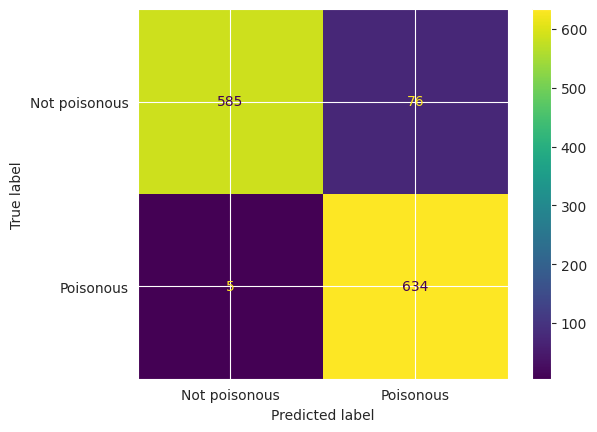

In [242]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    rf_pipeline, X_test, y_test, display_labels=['Not poisonous', 'Poisonous']);

The confusion matrix shows that our model predicted 5 False negatives, which means 5 poisonous mushrooms will be predicted as non-poisonous. Our task is to avoid these situations at all costs, so we need to find a way to make that left-bottom corner of confusion matrix to be 0.

## 4. Probabilities with `predict_proba()`

In this notebook we will try to change threshold with which we are predicting our classes.

**What is a threshold?**

It is a value above or below which a model predicts a different class.  
The default threshold is `0.5`, which means that if a sample has a `0.51` chance to be class 0 and a `0.49` chance to be class 1, the model will predict that sample as class 0.

In our case, this can be very dangerous because a `0.49` chance that a mushroom is poisonous is still a high chance, but our model with the default threshold will still predict it as non-poisonous.

If you're intending to eat a mushroom, would you prefer that it is labeled as poisonous even if it's non-poisonous, or that it is labeled non-poisonous even if it's poisonous?

Uneaten non-poisonous mushrooms are a pity, but eaten poisonous mushrooms are a deathly risk.

After moving the threshold, this will happen:  
A lot of non-poisonous might be labeled poisonous and they will be left uneaten, but at least no poisonous mushroom will be labeled non-poisonous and nobody will die!

The **`predict_proba()`** method will help us with our task.


`predict_proba()` is a method that many Scikit-Learn classification models have, including `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier` or the one we'll use in our example, `RandomForestClassifier`. (You can check what methods any Scikit-Learn transformer/model have by just looking at its documentation.) As [the documentation for that method outlines](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba), after fitting one of the mentioned models to the data,  `predict_proba()` will return the probabilities of each sample to belong to each possible class.

In our case, for each mushroom, `predict_proba()` will tell us the probability of that mushroom being non-poisonous (class 0) and poisonous (class 1). Let's have a look:

In [243]:
rf_proba = rf_pipeline.predict_proba(X_test)
pd.DataFrame(rf_proba)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,0,1
0,0.355755,0.644245
1,1.000000,0.000000
2,1.000000,0.000000
3,0.030378,0.969622
4,0.030378,0.969622
...,...,...
1295,1.000000,0.000000
1296,0.030378,0.969622
1297,1.000000,0.000000
1298,1.000000,0.000000


The `rf_proba` array has a shape of (1300,2):
* 1300 is the number of mushroooms in our X-test set  
* 2 is the number of classes, in our case 0 and 1 (non-poisonous and poisonous)  

The first column holds the values of probabilites for a mushroom being class 0  
The second column holds the values of probabilites for a mushroom being class 1

In [244]:
# If we select only the second column we will select all probabilities for our test mushrooms to be poisonous
rf_proba = rf_proba[:,1]
rf_proba

array([0.64424514, 0.        , 0.        , ..., 0.        , 0.        ,
       0.64424514])

## 5. ROC and threshold selection

ROC (receiver operating characteristic) and AUC (area under the curve) will help us with choosing the threshold. Please, go through these links to learn about these important metrics for binary classification. It will help you understand the rest of the notebook:  
* https://www.kaggle.com/getting-started/53782  
* https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/  
* https://www.youtube.com/watch?v=4jRBRDbJemM

The `roc_curve()` function computes the results of many models using several different thresholds, from 0 to 1. Then, it returns three arrays:

1. An array with false positive rates (the false alarm rate, i.e. out of all truly non poisonous mushrooms, how many are wrongly classified as poisonous?)
2. An array with true positive rates (the hit rate, i.e. out of all truly poisonous mushrooms, how many are correctly classified as poisonous?)
3. An array with the threshold that determines the results obtained in the two previous arrays.

More on the `roc_curve()` function here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html  

In [245]:
from sklearn.metrics import roc_curve

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_proba)

We can create a dataframe with fpr, tpr and threshold arrays that we got from roc_curve function and visualize the roc plot as well.

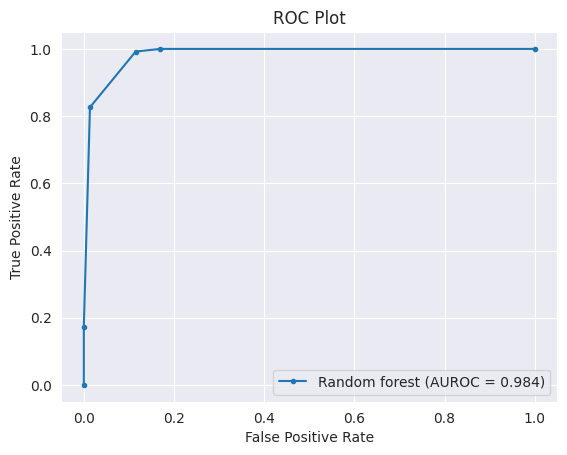

In [246]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test,rf_proba)

plt.plot(rf_fpr, rf_tpr, marker='.', label='Random forest (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

We can see on the above ROC plot that the True Positive Rate becomes 1 when the False Positive Rate is around **0.1**. Let's see: what is the value of the threshold when the True Positive Rate is 1?

In [247]:
win_threshold = pd.DataFrame({'fpr':rf_fpr,'tpr':rf_tpr,'threshold':rf_threshold})
win_threshold

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.173709,1.000000
2,0.013616,0.826291,0.969622
3,0.114977,0.992175,0.644245
4,0.169440,1.000000,0.201970
5,1.000000,1.000000,0.000000


Visually examining the above DataFrame, we can see that the TPR increases from 0 to 1 and finally reaches 1 in row 16. In that same row, the threshold value is 0.23, and that is the one we will choose to filter our results.

In [248]:
win_threshold_value= win_threshold.threshold[4]
win_threshold_value

0.2019704433497537

We encourage you to scan the results shown above, but here's a slightly more automated way to find the best threshold:

In [249]:
win_threshold[win_threshold.tpr==1].sort_values("threshold", ascending=False).head(1)

,fpr,tpr,threshold
4,0.16944,1.0,0.20197


## 6. Adjusting the predictions based on threshold value - X-test

The following code is filtering predicted values based on the probability of a sample being in class 1 (poisonous) that predicted_proba() returned.

If a value is higher than the threshold, it will set the prediction as 1 (poisonous). Only if a probability is lower than the threshold, the prediction will return a 0 (non-poisonous).

In [210]:
predicted_proba = rf_pipeline.predict_proba(X_test)
predicted_proba

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.35575486, 0.64424514],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.35575486, 0.64424514]])

In [211]:
(predicted_proba[:,1] >= win_threshold_value).astype('int')

array([1, 0, 0, ..., 0, 0, 1])

In [212]:
predicted = (predicted_proba[:,1] >= win_threshold_value).astype('int')

In [159]:
# just the sample so you can see how values are set based on predicted_proba values:
print(f'Probability: {predicted_proba[:5,1]}')
print(f'Set value: {predicted[:5]}')

Probability: [0.51685393 0.         0.         1.         1.        ]
Set value: [1 0 0 1 1]


## 7. Confusion matrix of adjusted results

In [213]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predicted)

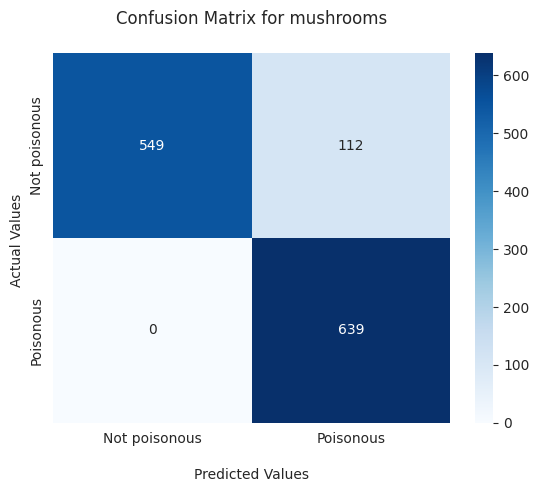

In [214]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix for mushrooms\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not poisonous','Poisonous'])
ax.yaxis.set_ticklabels(['Not poisonous','Poisonous'])

## Display the visualization of the Confusion Matrix.
plt.show()

## 8. Adjusting the predictions based on threshold value - test

Now we can do the same on a real test set that we want to predict:

In [250]:
predicted_proba_test = rf_pipeline.predict_proba(mush_test)
predicted_proba_test

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.35575486, 0.64424514],
       [0.03037818, 0.96962182],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.03037818, 0.96962182]])

In [251]:
# x[:,1] this is 2d slicing, here x[row_index, column_index]
predicted_proba_test[:,1]

array([0.64424514, 0.96962182, 0.        , ..., 1.        , 0.        ,
       0.96962182])

In [256]:
predicted_test = (predicted_proba_test[:,1] >= win_threshold_value)

In [216]:
predicted_test = (predicted_proba_test[:,1] >= win_threshold_value).astype('int')

In [257]:
predicted_test

array([ True,  True, False, ...,  True, False,  True])

## 9. Creating a submission file

In [217]:
submission_file = pd.DataFrame({'Id': mush_test.index, 'poisonous': pd.Series(predicted_test)})
submission_file

,Id,poisonous
0,5165,1
1,4281,1
2,231,0
3,3890,0
4,1521,1
...,...,...
1620,983,1
1621,7055,0
1622,7456,1
1623,5132,0


In [218]:
submission_file.to_csv('submission.csv', index=None )

In [219]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>